In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).
Выбрано: распределение χ2(хи-квадрат) с k степенями свободы, где k=8

In [12]:
chi_rv = sts.chi2(8)

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

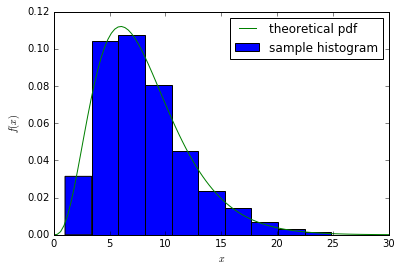

In [13]:
# выборка на 1000 элементов
sample = chi_rv.rvs(1000)
# создаем выборку из 1000 элементов на интервале от 0 до 30
x = np.linspace(0,30,100)
# строим гистограмму выборки хи-квадрат с количеством степеней K=8
pdf = chi_rv.pdf(x)
plt.hist(sample, normed=True, label='sample histogram')
# строим график теоретической плотности распределения хи-квадрат с количеством степеней K=8
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.
Для распределения χ^2, среднее: k, диcперсия: 2k, где k=8
   Cоответственно, p = N(EX,DX/n) = N(8, sqrt(16/n))

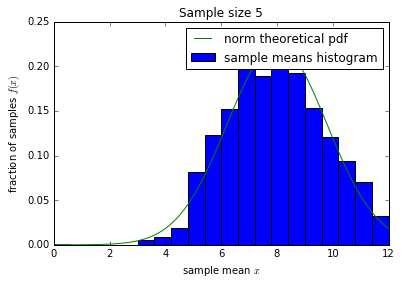

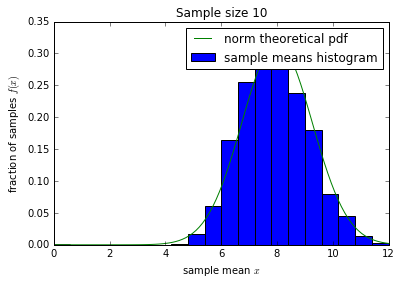

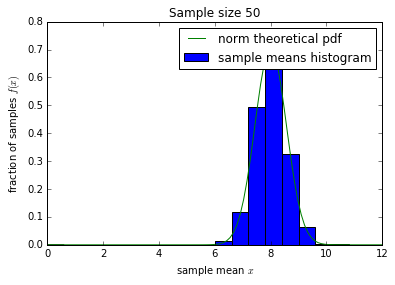

In [14]:

# Строим распределение выборочного среднего случайной величины хи-квадрат для выборок с размерами n равными 5, 10, 50:
for n in [5, 10, 50]:
    # вычисляется среднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(chi_rv.rvs(n).mean())
    # и строим на графике
    plt.hist(sample_means, 20, normed=True, range=[0, 12], label='sample means histogram')
    # вычисляем pdf плотность нормального распределения с данными параметрами (каждый раз одинаково)
    norm_rv = sts.norm(8, np.sqrt(2.*8./n))
    x = np.linspace(0, 12, 100)
    pdf = norm_rv.pdf(x)
    # выстраиваем на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к 8, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.
При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.